# Final Assignment: Classification Model Development

This is the second project derived from the Apprentice Chef Inc. case. This time, the goal is to examine how to make predictions based on cross-selling activities of clients using classification models. The data, which has 1949 customers is crucial to the analysis. 

The objective is to find insights that will improve the success of cross-selling by identifying which variables have more impact in the customer behavior, and their preferences.  

# Analyzing the data

Initiate the analysis with importing the packages necessary, taking into consideration the file and name of the dataset. 

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                #make scorer


# specifying the path and file name
file = 'Cross_Sell_Success_Dataset_2023.xlsx'

# reading the file into Python
apprentice_chef = pd.read_excel(file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
apprentice_chef.head(n = 5)

CROSS_SELL_SUCCESS                             EMAIL  REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES   AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED
0                   1       steffon.baratheon@yahoo.com   4920.0                  493                   9                            1                         10                    265.6                         5          5              2            0                 0             137.41                   6         2.894737                  456
1                   0           harlon.greyjoy@visa.com   6150.0                  361                   9                            1                          6                    247.0                         2          5              1            0                 0             120.20                   5         2.631579                  680
2                   0            monster@protonmail.com   3435.0                  278                   6                            1                          4                    164.4                         0          6              1            5                 0             127.00                   3         3.684211                  145
3                   1  damon.lannister.(lord)@yahoo.com   3330.0                  269                   8                            1                          2                    176.0                         5          5              2            0                 0             129.78                   6         3.157895                  418
4                   1        raynald.westerling@jnj.com   3427.5                  276                   7                            1                         10                    164.6                         0          6              1           14                 0              34.42                   3         3.157895                  174

Understanding cross- sell success:

The possibility to introduce new items to existing consumers and existing products to new customers directly related to the magnitude of the cross-selling opportunity. The connection and bond that cross sell success increase with the consumers is important to companies, and here to Apprentice Chef Inc to increase the revenues, the customer satisfaction and build or strength the relationship(1).


In [2]:
# Analyzing how many customers i need to analyze and the number of features to count. 
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice_chef.shape[0]}
Features:     {apprentice_chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     17



Considering 1949 customers with 17 features or variables to analyze. The Cross Sell Success is the variable-y for this analysis. From the rest of variables as the x-variables, the EMAIL variable is the only object type. The dictionary of the variables help to understand the description of it to categorize them. 


In [3]:
#Understanding each of my columns
# pulling up data dictionary
apprentice_chef_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')


# displaying the data dictionary
apprentice_chef_description

Feature Data Type                                                                                          Description
0                       REVENUE     Float  Total revenue generated from each customer. Note that at times discounts are applied due to spec...
1            CROSS_SELL_SUCCESS   Integer                                                Success of the cross-sell promotion (1 = yes, 0 = no)
2                          NAME    string                                                                                Full name of customer
3                         EMAIL    string                                                                                    Email of customer
4                    FIRST_NAME    string                                                                               First name of customer
5                   FAMILY_NAME    string                                                                                Last name of customer
6           TOTAL_MEALS_ORDERED   Integer       Total number of meals ordered by each customer. Customers can order several meals at one time.
7            UNIQUE_MEALS_PURCH   Integer                                                  Number of unique meal sets ordered by each customer
8   CONTACTS_W_CUSTOMER_SERVICE   Integer  Number of times each customer made contact with customer service. This number does not include r...
9     PRODUCT_CATEGORIES_VIEWED   Integer                                                 Total number of meal categories viewed (vegan, etc.)
10      AVG_TIME_PER_SITE_VISIT     Float                                     Average time each customer spent per website or mobile app visit
11     CANCELLATIONS_AFTER_NOON   Integer                             Number of meals canceled AFTER 12:00 PM (noon) as per cancelation policy
12                    PC_LOGINS   Integer                                                                Total number of logins to the website
13                MOBILE_LOGINS   Integer                                                        Total number of logins to the mobile platform
14                  WEEKLY_PLAN   Integer                            Number of weeks customer subscribed to the weekly plan discount promotion
15              LATE_DELIVERIES   Integer                                                              Total meal deliveries that arrived late
16            AVG_PREP_VID_TIME     Float                                  Average time in seconds meal prep instruction video was was playing
17          AVERAGE_MEAL_RATING   Integer                          Average rating of meal sets by each customer. Unrated meals are not counted
18           LARGEST_ORDER_SIZE   Integer  MISLABELED: Despite the fact that this feature is labeled LARGEST_ORDER_SIZE, it actually repres...
19          TOTAL_PHOTOS_VIEWED   Integer                             Total number of clicks on photos across all website or mobile app visits

Identifying the variables integers, floats and objects. Realizing that emails is an object that could be converted into a numerical variable to be used on the analysis. 

In [4]:
# Viewing the data frame to detect the type of each variable
apprentice_chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

# Cleaning the Data

In [7]:
# Setting the functions 
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [8]:
# Getting the variables on the dataset to group by categories
#using a loop to print column names one by one to see which ones are the 
#variables to consider into the analysis 
for column in apprentice_chef:
    print(column)

CROSS_SELL_SUCCESS
EMAIL
REVENUE
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED


Classifying if the variables are continous, interval, count, or categorical:

In [9]:
#Classification of my columns
#To understand which are the groups of the data:
#Only text (do not run- no code)
    
CONTINUOUS
------------
REVENUE   
AVG_TIME_PER_SITE_VISIT 
AVG_PREP_VID_TIME
AVG_MEAN_RATING

  

INTERVAL/COUNT
--------------
CROSS_SELL_SUCCESS (Y-variable)
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH  
CONTACTS_W_CUSTOMER_SERVICE 
PC_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES
LARGEST_ORDER_SIZE
TOTAL_PHOTOS_VIEWED 

CATEGORICAL/OTHER
-----------------
EMAIL


SyntaxError: invalid syntax (4071152325.py, line 6)

Using describe function to give different statistics values of the variables for each numeric column and round it into 2 decimals: Count, mean, standards deviation min and max, to consider when creating the new features. 

In [10]:
# descriptive statistics for numeric data
apprentice_chef.describe(include = 'number').round(2)

CROSS_SELL_SUCCESS  REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES   AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED
count             1946.00  1946.00              1946.00             1946.00                       1946.0                    1946.00                  1946.00                   1946.00    1946.00        1946.00      1946.00           1946.00            1946.00             1946.00          1946.00              1946.00
mean                 0.68  2107.29                74.63                6.98                          4.9                       5.38                   150.56                      1.57       5.52           1.48        11.33              2.05              99.60                4.44             3.55               113.15
std                  0.47  1138.29                55.31                2.28                          2.5                       3.04                    49.45                      1.61       0.58           0.53        13.57              3.79              62.34                1.55             0.61               177.15
min                  0.00   131.00                11.00                1.00                          1.0                       1.00                    33.40                      0.00       4.00           0.00         0.00              0.00              10.33                1.00             1.32                 1.00
25%                  0.00  1350.00                39.00                5.00                          3.0                       3.00                   114.40                      0.00       5.00           1.00         1.00              0.00              72.00                3.00             3.16                10.00
50%                  1.00  1740.00                60.00                7.00                          5.0                       5.00                   145.60                      1.00       6.00           1.00         7.00              0.00              94.16                4.00             3.42                17.00
75%                  1.00  2670.00                95.00                8.00                          7.0                       8.00                   173.78                      2.00       6.00           2.00        13.00              3.00             117.29                5.00             3.95               174.00
max                  1.00  8793.75               493.00               18.00                         19.0                      10.00                   564.20                     13.00       7.00           3.00        52.00             18.00            1645.60               11.00             5.00              1600.00

In [11]:
##################
##################
# running the mv_flagger function
apprentice_chef = mv_flagger(df = apprentice_chef)


# checking results
apprentice_chef.columns

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

The analysis will focus on these 1321 customers who accepted the cross sell promotion, to analyze their behavior and preferences.  

In [12]:
# Checking value counts for Cross Sell Success
apprentice_chef['CROSS_SELL_SUCCESS'].value_counts(normalize = False,
                                        sort      = False,
                                        ascending = False)

1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64

In [13]:
# Creating a list of continuous features (including CROSS SELL SUCCESS)
continuous_data = ['CROSS_SELL_SUCCESS','REVENUE','CANCELLATIONS_AFTER_NOON','AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'AVG_MEAN_RATING','TOTAL_MEALS_ORDERED', 'MOBILE_LOGINS'
                  ,'PC_LOGINS', 'UNIQUE_MEALS_PURCH', 'LATE_DELIVERIES ', 'CONTACTS_W_CUSTOMER_SERVICE', 'WEEKLY_PLAN','LARGEST_ORDER_SIZE', 'TOTAL_PHOTOS_VIEWED' ]

# Developing a correlation matrix based on continuous features
apprentice_chef_corr = apprentice_chef[continuous_data].corr(method = 'pearson')

# Filtering the results to only show correlations with REVENUE
apprentice_chef_corr.loc[ : , 'CROSS_SELL_SUCCESS'].round(decimals = 2).sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
PC_LOGINS                      0.04
UNIQUE_MEALS_PURCH             0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
AVG_PREP_VID_TIME              0.01
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
WEEKLY_PLAN                   -0.01
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

The higher correlation between the variables with Cross Sell Success is cancellations after noon, but still the correlation is very low to be able to consider how it will be essential.

In [ ]:
#categorical encoding strategies

In [ ]:
# Only strings - not code
# CROSS_SELL_SUCCESS: binary categorical variable - one-hot encoded
#EMAIL: discrete variable
#REVENUE: continuous variable
#TOTAL_MEALS_ORDERED: count variable
#UNIQUE_MEALS_PURCH:  variable
#CONTACTS_W_CUSTOMER_SERVICE: discrete variable
#PRODUCT_CATEGORIES_VIEWED: discrete variable
#AVG_TIME_PER_SITE_VISIT: continuous variable
#CANCELLATIONS_AFTER_NOON: continous variable
#PC_LOGINS: continous variable
#MOBILE_LOGINS: continous variable
#WEEKLY_PLAN: discrete variable
#LATE_DELIVERIES: discrete variable
#AVG_PREP_VID_TIME: continuous variable
#LARGEST_ORDER_SIZE: discrete variable
#AVG_MEAN_RATING: continuous variable
#TOTAL_PHOTOS_VIEWED: count variable

# Converting Variables
## Creating dummy variables

As the information for emails is giving me three different types of emails as stated on the case study, which could be useful for the analysis, it is crucial to categorize and convert the information of email into dummy variables.

In [14]:
print(apprentice_chef.columns)

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


The emails have different domains classified as personal, professional and junk, first separating the domain which will classify the email into these 3 groups and the actual email, which also could give information about name or gender if needed.

In [15]:
#Create an empty list (placeholder_lst)
#Loop over each email in placeholder_lst and SPLIT each personal email based on a common attribute (find a character that each email address has in common and use it to SPLIT email and domain).
#APPEND placeholder_lst with split_email.
#Convert placeholder_lst into a DataFrame.
#Display the DataFrame and check your results.

# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_ac = pd.DataFrame(placeholder_lst)


# displaying the results email_ac (apprentice chef)
email_ac

0               1
0          steffon.baratheon       yahoo.com
1             harlon.greyjoy        visa.com
2                    monster  protonmail.com
3     damon.lannister.(lord)       yahoo.com
4         raynald.westerling         jnj.com
...                      ...             ...
1941        wat.(barleycorn)        live.com
1942          hendry.bracken       exxon.com
1943       aenys.i.targaryen    passport.com
1944            leo.blackbar          pg.com
1945                   anguy      boeing.com

[1946 rows x 2 columns]

The 2 Columns separated with the domains, which now will be classified into different groups according to which emails are professional, personal and junk, with the count of each domain in the dataset.

In [16]:
# STEP 2: Concatenating with original DataFrame

# safety measure in case of multiple concatenations
apprentice_chef = pd.read_excel(file)

# renaming column to concatenate
email_ac.columns = ['0' , 'NEW_DOMAIN']

# concatenating domain_email_domain with aprentice chef DataFrame
apprentice_chef = pd.concat([apprentice_chef, email_ac['NEW_DOMAIN']], axis=1)

# printing value counts of domain emails
print(apprentice_chef['NEW_DOMAIN'].value_counts())


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
mcdonalds.com        28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
pg.com               22
verizon.com          22
mmm.com              22
caterpillar.com      22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: NEW_DOMAIN, dtype: int64


In [17]:
# STEP 3: Creating different lists according to which email is according to their domain.
# creating a list with emails that have professional, personal and junk domain

PROFESSIONAL_EMAIL = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 
                    'caterpillar.com', 'chevron.com', 'cisco.com',
                    'cocacola.com', 'disney.com', 'dupont.com', 
                    'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com',
                    'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
                    'mcdonalds.com', 'merck.com', 'microsoft.com',
                    'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 
                    'unitedtech.com', 'unitedhealth.com',
                    'verizon.com', 'visa.com', 'walmart.com']

# creating a list with emails that have personal domain

PERSONAL_EMAIL     = ['gmail.com', 'yahoo.com', 'protonmail.com']

# creating a list with emails that have junk domain

JUNK_EMAIL         = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 
                      'msn.com', 'passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for email in apprentice_chef['EMAIL']:
    domain = email.split('@')[1]
    
    if domain in PERSONAL_EMAIL:
        placeholder_lst.append('PERSONAL')
        
    elif domain in PROFESSIONAL_EMAIL:
        placeholder_lst.append('PROFESSIONAL')
        
    elif domain in JUNK_EMAIL:
        placeholder_lst.append('JUNK')
        
    else:
        print('UNKNOWN')

# concatenating with original DataFrame
apprentice_chef['NEW_DOMAIN'] = pd.Series(placeholder_lst)

# checking results
apprentice_chef['NEW_DOMAIN'].value_counts()

PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: NEW_DOMAIN, dtype: int64

The value counts indicate that there are 861 personal email addresses, 696 professional email addresses, and 389 junk email addresses. With the different lists created, the emails are split into 3 different columns. 

In [18]:
#STEP 4: Creating Dummy Variables

# Creating dummy variable for the emails
one_hot_dummy = pd.get_dummies(apprentice_chef['NEW_DOMAIN'], prefix = 'NEW_DOMAIN')

#dropping the original domain group category since it has become unneccessary
apprentice_chef.drop('NEW_DOMAIN', axis = 1, inplace = True)

apprentice_chef = pd.concat([apprentice_chef, one_hot_dummy], axis=1)

#apprentice['DOMAIN_GROUP'].value_counts()
apprentice_chef.head(n = 5)

CROSS_SELL_SUCCESS                             EMAIL  REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES   AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED  NEW_DOMAIN_JUNK  NEW_DOMAIN_PERSONAL  NEW_DOMAIN_PROFESSIONAL
0                   1       steffon.baratheon@yahoo.com   4920.0                  493                   9                            1                         10                    265.6                         5          5              2            0                 0             137.41                   6         2.894737                  456                0                    1                        0
1                   0           harlon.greyjoy@visa.com   6150.0                  361                   9                            1                          6                    247.0                         2          5              1            0                 0             120.20                   5         2.631579                  680                0                    0                        1
2                   0            monster@protonmail.com   3435.0                  278                   6                            1                          4                    164.4                         0          6              1            5                 0             127.00                   3         3.684211                  145                0                    1                        0
3                   1  damon.lannister.(lord)@yahoo.com   3330.0                  269                   8                            1                          2                    176.0                         5          5              2            0                 0             129.78                   6         3.157895                  418                0                    1                        0
4                   1        raynald.westerling@jnj.com   3427.5                  276                   7                            1                         10                    164.6                         0          6              1           14                 0              34.42                   3         3.157895                  174                0                    0                        1

In [19]:
# Count for personal emails 
apprentice_chef['NEW_DOMAIN_PERSONAL'].value_counts()

0    1085
1     861
Name: NEW_DOMAIN_PERSONAL, dtype: int64

In [20]:
# Count for professional emails 
apprentice_chef['NEW_DOMAIN_PROFESSIONAL'].value_counts()

0    1250
1     696
Name: NEW_DOMAIN_PROFESSIONAL, dtype: int64

In [21]:
# Count for professional emails 
apprentice_chef['NEW_DOMAIN_JUNK'].value_counts()

0    1557
1     389
Name: NEW_DOMAIN_JUNK, dtype: int64

In [22]:
for val in apprentice_chef:
    print(f" {val} + ")

 CROSS_SELL_SUCCESS + 
 EMAIL + 
 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES  + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 NEW_DOMAIN_JUNK + 
 NEW_DOMAIN_PERSONAL + 
 NEW_DOMAIN_PROFESSIONAL + 


The new columns for emails as a numeric type are included and verified into the headings.

In [23]:
apprentice_chef.head(n = 5)

CROSS_SELL_SUCCESS                             EMAIL  REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  CANCELLATIONS_AFTER_NOON  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  LATE_DELIVERIES   AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  AVG_MEAN_RATING  TOTAL_PHOTOS_VIEWED  NEW_DOMAIN_JUNK  NEW_DOMAIN_PERSONAL  NEW_DOMAIN_PROFESSIONAL
0                   1       steffon.baratheon@yahoo.com   4920.0                  493                   9                            1                         10                    265.6                         5          5              2            0                 0             137.41                   6         2.894737                  456                0                    1                        0
1                   0           harlon.greyjoy@visa.com   6150.0                  361                   9                            1                          6                    247.0                         2          5              1            0                 0             120.20                   5         2.631579                  680                0                    0                        1
2                   0            monster@protonmail.com   3435.0                  278                   6                            1                          4                    164.4                         0          6              1            5                 0             127.00                   3         3.684211                  145                0                    1                        0
3                   1  damon.lannister.(lord)@yahoo.com   3330.0                  269                   8                            1                          2                    176.0                         5          5              2            0                 0             129.78                   6         3.157895                  418                0                    1                        0
4                   1        raynald.westerling@jnj.com   3427.5                  276                   7                            1                         10                    164.6                         0          6              1           14                 0              34.42                   3         3.157895                  174                0                    0                        1

In [ ]:
# dropping post-event horizon features
# analyzing if i drop the emails later to run the models
#apprentice_chef = apprentice_chef.drop(labels = 'EMAIL',
                      # axis   = 1)


# checking results
#apprentice_chef.columns


# Creation of Features

Taking into consideration the features that I classify as they will have an impact in the cross_sell_success

Customer segmentation to see which are my variables that can be used for my classification. Each feature created in response to logic into which could be the better approaches to improveme the cross sell success. The correlation is not much taken into consideration when creating the futures (different than last analysis) because the values are low, still the higher correlations given are considered but also not as a main reason to it.

The next features are created:

## High Value Feature

In [24]:
#Exploring the values for each column:
# Double verify the mean of a Revenue to classify into categories:
revenue_mean = apprentice_chef['REVENUE'].mean() #mean is calculated by adding up all the values in the dataset and dividing by the total number of values. 
revenue_median = apprentice_chef['REVENUE'].median() # to know the middle value of the column dataset
revenue_mode = apprentice_chef['REVENUE'].mode() #The value that occurs most frequently in a dataset

print(revenue_mean, revenue_median, revenue_mode)

2107.292651593011 1740.0 0    1350.0
Name: REVENUE, dtype: float64


In [25]:
# Placeholder for 'High Value' Customer feature - for the customers with the higher revenue
apprentice_chef['HIGH_VALUE'] = 0


# replacing values based on a condition
for index, val in apprentice_chef.iterrows():
    if apprentice_chef.loc[index, 'REVENUE'] > 2107.29:
        apprentice_chef.loc[index, 'HIGH_VALUE'] = 1


# checking results
apprentice_chef['HIGH_VALUE'].value_counts(normalize = False,
                              sort      = False,
                              ascending = False)

1     633
0    1313
Name: HIGH_VALUE, dtype: int64

## Potential Customer Feature

In [26]:
# calculate the mean of a Total_meals_ordered to classify into categories:
total_meals_mean = apprentice_chef['TOTAL_MEALS_ORDERED'].mean() #mean is calculated by adding up all the values in the dataset and dividing by the total number of values. 
total_meals_median = apprentice_chef['TOTAL_MEALS_ORDERED'].median() # to know the middle value of the column dataset
total_meals_mode = apprentice_chef['TOTAL_MEALS_ORDERED'].mode() #The value that occurs most frequently in a dataset

print(total_meals_mean, total_meals_median, total_meals_mode)

74.63412127440904 60.0 0    15
Name: TOTAL_MEALS_ORDERED, dtype: int64


In [27]:
# placeholder for 'REGULAR_CUSTOMER' feature
apprentice_chef['POTENTIAL_CUSTOMER'] = 1


# replacing values based on a condition
for index, val in apprentice_chef.iterrows():
    if apprentice_chef.loc[index, 'TOTAL_MEALS_ORDERED'] <= 74:
        apprentice_chef.loc[index, 'POTENTIAL_CUSTOMER'] = 0


# checking results
apprentice_chef['POTENTIAL_CUSTOMER'].value_counts(normalize = False,
                            sort      = False,
                            ascending = False)

1     717
0    1229
Name: POTENTIAL_CUSTOMER, dtype: int64

717 Potential customers ordering less than 74 meals, which could increase

## Customer Type: Loyal Customer Feature

Analyze which customer is loyal and have a relationship with Apprentice Chef Inc, the company can encourage the clients' devotion by providing them with exclusive discounts.-Less than 74 meals are regular customers
-More than 74 meals- are the customers that can be considered - potential loyal customers 
-More than 200 meals - are loyal customers

In [28]:
##### SEE IF I CAN DO THE FEAUTRES OF 3
#Divide into a group of 3 according to the type of customers 
# Use np.where() to create a new column that classifies the customers
apprentice_chef['CUSTOMER_TYPE'] = np.where(apprentice_chef['TOTAL_MEALS_ORDERED'] <= 74, 'REGULAR_CUSTOMER', 
                    np.where(apprentice_chef['TOTAL_MEALS_ORDERED'] <= 200, 'POTENTIAL_LOYAL_CUSTOMER', 'LOYAL_CUSTOMER'))

# Check the results
customer_type_counts = apprentice_chef['CUSTOMER_TYPE'].value_counts(normalize=False, sort=False, ascending=False)
print(customer_type_counts)

LOYAL_CUSTOMER                77
REGULAR_CUSTOMER            1229
POTENTIAL_LOYAL_CUSTOMER     640
Name: CUSTOMER_TYPE, dtype: int64


There are 77 loyal customers, 640 potential loyal customers, and 1229 loyal customers.

Consider providing them with special cross-sell marketing. Based on their prior purchasing history, these promos can be customized to their unique preferences.

## Customer Type:  Loyal Customer Feature

From the feature created under the Customer type, using the regular customer as a feature converting it into a binary to be able to use it. 

In [29]:
#This is my variable to use as loyal customer - binary
# placeholder for 'REGULAR_CUSTOMER' feature
apprentice_chef['LOYAL_CUSTOMER'] = 1


# replacing values based on a condition
for index, val in apprentice_chef.iterrows():
    if apprentice_chef.loc[index, 'TOTAL_MEALS_ORDERED'] <= 74:
        apprentice_chef.loc[index, 'LOYAL_CUSTOMER'] = 0


# checking results
apprentice_chef['LOYAL_CUSTOMER'].value_counts(normalize = False,
                                                sort      = False,
                                                ascending = False)

1     717
0    1229
Name: LOYAL_CUSTOMER, dtype: int64

## Good customer Feature

In [30]:
# calculate the mean of a Total_meals_ordered to classify into categories:
cancellations_mean = apprentice_chef['CANCELLATIONS_AFTER_NOON'].mean() #mean is calculated by adding up all the values in the dataset and dividing by the total number of values. 
cancellations_median = apprentice_chef['CANCELLATIONS_AFTER_NOON'].median() # to know the middle value of the column dataset
cancellations_mode = apprentice_chef['CANCELLATIONS_AFTER_NOON'].mode() #The value that occurs most frequently in a dataset

print(cancellations_mean, 
      cancellations_median, 
      cancellations_mode)

1.5709146968139773 1.0 0    1
Name: CANCELLATIONS_AFTER_NOON, dtype: int64


In [31]:
# placeholder for 'GOOD_CUSTOMER' feature
apprentice_chef['GOOD_CUSTOMER'] = 1


# replacing values based on a condition
for index, val in apprentice_chef.iterrows():
    if apprentice_chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] >4:
        apprentice_chef.loc[index, 'GOOD_CUSTOMER'] = 0


# checking results
apprentice_chef['GOOD_CUSTOMER'].value_counts(normalize = False,
                            sort      = False,
                            ascending = False)

0     110
1    1836
Name: GOOD_CUSTOMER, dtype: int64

## Week Subscription Loyal Feature

In [32]:
# calculate the mean of a Total_meals_ordered to classify into categories:
weekly_plan_mean = apprentice_chef['WEEKLY_PLAN'].mean() #mean is calculated by adding up all the values in the dataset and dividing by the total number of values. 

print(weekly_plan_mean)

11.329907502569373


11 meals is the average of weeks 

In [33]:
# placeholder for '' feature
apprentice_chef['WEEK_SUBSCRIPTION_LOYAL'] = 0


# replacing values based on a condition
for index, val in apprentice_chef.iterrows():
    if apprentice_chef.loc[index, 'WEEKLY_PLAN'] >11.329:
        apprentice_chef.loc[index, 'WEEK_SUBSCRIPTION_LOYAL'] = 1


# checking results
apprentice_chef['WEEK_SUBSCRIPTION_LOYAL'].value_counts(normalize = False,
                            sort      = False,
                            ascending = False)

0    1287
1     659
Name: WEEK_SUBSCRIPTION_LOYAL, dtype: int64

659 Customers with a loyalty weekly subscription of more than 11 

In [34]:
# checking the columns
apprentice_chef.columns

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'NEW_DOMAIN_JUNK', 'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER', 'CUSTOMER_TYPE', 'LOYAL_CUSTOMER', 'GOOD_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL'], dtype='object')

Verifying all the type of columns and features created, to be sure that the numerical columns are used for the models.

In [35]:
# Viewing the data frame to detect the type of each variable
apprentice_chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

# Logistic Regressions Classifier

In [43]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

## Correlation analysis:

I see that my correlation between some variables are higher, which give me a reason to analyze them better:

In [44]:
apprentice_chef_corr = apprentice_chef.corr().round(2)

apprentice_chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
NEW_DOMAIN_PROFESSIONAL        0.19
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
NEW_DOMAIN_PERSONAL            0.04
AVG_TIME_PER_SITE_VISIT        0.03
LARGEST_ORDER_SIZE             0.02
LATE_DELIVERIES                0.02
LOYAL_CUSTOMER                 0.01
POTENTIAL_CUSTOMER             0.01
TOTAL_PHOTOS_VIEWED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_MEALS_ORDERED            0.01
WEEK_SUBSCRIPTION_LOYAL        0.01
REVENUE                        0.00
PRODUCT_CATEGORIES_VIEWED      0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
WEEKLY_PLAN                   -0.01
HIGH_VALUE                    -0.01
AVG_MEAN_RATING               -0.04
GOOD_CUSTOMER                 -0.05
NEW_DOMAIN_JUNK               -0.28
Name: CROSS_SELL_SUCCESS, dtype: float64

No need to use log because all values under 1.00

## Stratifying the response variable

In order to prevent the model's performance from being distorted by an imbalanced representation of one class in the data, stratifying the response variable makes sure that both the training and testing datasets contain an equal amount of each class.

In [45]:
apprentice_chef.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

In [46]:
# declaring explanatory variables
apprentice_chef_data = apprentice_chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
apprentice_chef_target = apprentice_chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [47]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_chef_data,
            apprentice_chef_target,
            test_size    = 0.10,  # test size set to 0.10 - following criterion 9
            random_state = 219,
            stratify     = apprentice_chef_target) # preserving balance


# merging training data for statsmodels
apprentice_chef_train = pd.concat([x_train, y_train], axis = 1)

In [48]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")






Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



# Univariate Logistic Regression Model

In [49]:
# dropping post-event horizon features
# analyzing if i drop the emails later to run the models
apprentice_chef = apprentice_chef.drop(labels = 'CONTACTS_W_CUSTOMER_SERVICE',
                       axis   = 1)


#checking results
apprentice_chef.columns

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'NEW_DOMAIN_JUNK', 'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER', 'CUSTOMER_TYPE', 'LOYAL_CUSTOMER', 'GOOD_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL'], dtype='object')

In order to predict the variables that will be best for my model , using the variable that are higher correlated: 
1. Cancellations after noon 
2. New Domain Professional
2. New Domain Junk

In [50]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ CANCELLATIONS_AFTER_NOON""",
                           data    = apprentice_chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.616934
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit              Pseudo R-squared: 0.017     
Dependent Variable:  CROSS_SELL_SUCCESS AIC:              2164.5023 
Date:                2023-02-19 19:02   BIC:              2175.4382 
No. Observations:    1751               Log-Likelihood:   -1080.3   
Df Model:            1                  LL-Null:          -1098.9   
Df Residuals:        1749               LLR p-value:      1.0026e-09
Converged:           1.0000             Scale:            1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                0.4421   0.0713 6.2021 0.0000 0.3024 0.5818
CANCELLATIONS_AFTER_NOON 0.2099   0.0362 5.8028 0.0000 0.1390 0.2807
====================================================================

"""

In [51]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ NEW_DOMAIN_PROFESSIONAL""",
                           data    = apprentice_chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.608692
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.030     
Dependent Variable: CROSS_SELL_SUCCESS AIC:              2135.6399 
Date:               2023-02-19 19:02   BIC:              2146.5758 
No. Observations:   1751               Log-Likelihood:   -1065.8   
Df Model:           1                  LL-Null:          -1098.9   
Df Residuals:       1749               LLR p-value:      4.1111e-16
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     5.0000                                         
-------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------
Intercept               0.4558   0.0614 7.4192 0.0000 0.3354 0.5762
NEW_DOMAIN_PROFESSIONAL 0.9110   0.1162 7.8398 0.0000 0.6832 1.1387
===================================================================

"""

In [52]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ NEW_DOMAIN_JUNK""",
                           data    = apprentice_chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.589519
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit              Pseudo R-squared: 0.061     
Dependent Variable: CROSS_SELL_SUCCESS AIC:              2068.4972 
Date:               2023-02-19 19:02   BIC:              2079.4331 
No. Observations:   1751               Log-Likelihood:   -1032.2   
Df Model:           1                  LL-Null:          -1098.9   
Df Residuals:       1749               LLR p-value:      7.6763e-31
Converged:          1.0000             Scale:            1.0000    
No. Iterations:     5.0000                                         
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           1.0722   0.0612  17.5105 0.0000  0.9522  1.1922
NEW_DOMAIN_JUNK    -1.4275   0.1251 -11.4127 0.0000 -1.6726 -1.1823
===================================================================

"""

The values for the P-value and difference of BIC and AIC values in the 3 logistic regression model objects are showing me similar results. The P-value seem to be working correctly for this variables which i need to analyze in better detail. The pseudo R-squared are between a 0 and 1 with a low performance, but still is working.

# Logistic Regression model - with explanatory variables

In [53]:
for val in apprentice_chef_data:
    print(f" {val} + ")

 EMAIL + 
 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES  + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 NEW_DOMAIN_JUNK + 
 NEW_DOMAIN_PERSONAL + 
 NEW_DOMAIN_PROFESSIONAL + 
 HIGH_VALUE + 
 POTENTIAL_CUSTOMER + 
 CUSTOMER_TYPE + 
 LOYAL_CUSTOMER + 
 GOOD_CUSTOMER + 
 WEEK_SUBSCRIPTION_LOYAL + 


Running the logistic regression model object with the explanatory variables - all of them, taking only out the variables that could be repeated due to the creation of new features, like Revenue or Cancellations after noon which are used in my featured variables.

In [54]:
# instantiating a logistic regression model object
# Running the regression with my features (with the variables created)
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                             UNIQUE_MEALS_PURCH + 
                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                             PRODUCT_CATEGORIES_VIEWED + 
                                             AVG_TIME_PER_SITE_VISIT + 
                                             PC_LOGINS + 
                                             MOBILE_LOGINS + 
                                             AVG_PREP_VID_TIME + 
                                             LARGEST_ORDER_SIZE + 
                                             AVG_MEAN_RATING +
                                             TOTAL_PHOTOS_VIEWED +
                                             NEW_DOMAIN_JUNK + 
                                             NEW_DOMAIN_PROFESSIONAL + 
                                             HIGH_VALUE + 
                                             GOOD_CUSTOMER + 
                                             WEEK_SUBSCRIPTION_LOYAL""",
                                            data    = apprentice_chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.575584
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit                Pseudo R-squared:   0.083     
Dependent Variable:     CROSS_SELL_SUCCESS   AIC:                2047.6941 
Date:                   2023-02-19 19:02     BIC:                2135.1812 
No. Observations:       1751                 Log-Likelihood:     -1007.8   
Df Model:               15                   LL-Null:            -1098.9   
Df Residuals:           1735                 LLR p-value:        8.8471e-31
Converged:              1.0000               Scale:              1.0000    
No. Iterations:         5.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   -0.0109   0.8124 -0.0135 0.9893 -1.6031  1.5813
UNIQUE_MEALS_PURCH           0.0495   0.0242  2.0496 0.0404  0.0022  0.0969
CONTACTS_W_CUSTOMER_SERVICE  0.0182   0.0227  0.8006 0.4233 -0.0264  0.0628
PRODUCT_CATEGORIES_VIEWED    0.0047   0.0179  0.2620 0.7933 -0.0303  0.0397
AVG_TIME_PER_SITE_VISIT      0.0043   0.0022  1.9285 0.0538 -0.0001  0.0087
PC_LOGINS                    0.1712   0.0932  1.8377 0.0661 -0.0114  0.3538
MOBILE_LOGINS                0.2855   0.1047  2.7258 0.0064  0.0802  0.4907
AVG_PREP_VID_TIME            0.0004   0.0009  0.4397 0.6602 -0.0014  0.0022
LARGEST_ORDER_SIZE          -0.0699   0.0609 -1.1487 0.2507 -0.1892  0.0494
AVG_MEAN_RATING             -0.1714   0.1057 -1.6219 0.1048 -0.3785  0.0357
TOTAL_PHOTOS_VIEWED         -0.0002   0.0003 -0.5626 0.5737 -0.0009  0.0005
NEW_DOMAIN_JUNK             -1.2342   0.1365 -9.0399 0.0000 -1.5018 -0.9666
NEW_DOMAIN_PROFESSIONAL      0.5177   0.1277  4.0545 0.0001  0.2674  0.7679
HIGH_VALUE                  -0.3231   0.1476 -2.1886 0.0286 -0.6124 -0.0337
GOOD_CUSTOMER               -0.6544   0.2642 -2.4773 0.0132 -1.1722 -0.1367
WEEK_SUBSCRIPTION_LOYAL      0.0995   0.1158  0.8597 0.3899 -0.1274  0.3264
===========================================================================

"""

The last model runned showed me the P-values that give me my best scores which are taken into consideration, I create then 2 different samples which will be important to run the models which are shown next.

My best features: NEW_DOMAIN_JUNK, UNIQUE_MEALS_PURCH, AVG_TIME_PER_SITE_VISIT, MOBILE_LOGINS, NEW_DOMAIN_PROFESSIONAL, HIGH_VALUE,  GOOD_CUSTOMER, PC_LOGINS. These are the variables I consider for the next part:

## Logistic Regression model - Sample 1

In [55]:
#Sample 1
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                             UNIQUE_MEALS_PURCH + 
                                             AVG_TIME_PER_SITE_VISIT + 
                                             MOBILE_LOGINS +
                                             PC_LOGINS +
                                             NEW_DOMAIN_JUNK + 
                                             NEW_DOMAIN_PROFESSIONAL + 
                                             HIGH_VALUE + 
                                             GOOD_CUSTOMER """,
                                        data    = apprentice_chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.577237
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit               Pseudo R-squared:  0.080     
Dependent Variable:   CROSS_SELL_SUCCESS  AIC:               2039.4854 
Date:                 2023-02-19 19:03    BIC:               2088.6969 
No. Observations:     1751                Log-Likelihood:    -1010.7   
Df Model:             8                   LL-Null:           -1098.9   
Df Residuals:         1742                LLR p-value:       6.0481e-34
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -0.5599   0.6326 -0.8851 0.3761 -1.7999  0.6800
UNIQUE_MEALS_PURCH       0.0461   0.0240  1.9250 0.0542 -0.0008  0.0931
AVG_TIME_PER_SITE_VISIT  0.0030   0.0013  2.2277 0.0259  0.0004  0.0056
MOBILE_LOGINS            0.2651   0.1032  2.5690 0.0102  0.0628  0.4673
PC_LOGINS                0.1702   0.0925  1.8392 0.0659 -0.0112  0.3516
NEW_DOMAIN_JUNK         -1.2228   0.1360 -8.9893 0.0000 -1.4895 -0.9562
NEW_DOMAIN_PROFESSIONAL  0.5228   0.1274  4.1035 0.0000  0.2731  0.7725
HIGH_VALUE              -0.2275   0.1367 -1.6640 0.0961 -0.4954  0.0405
GOOD_CUSTOMER           -0.6336   0.2632 -2.4071 0.0161 -1.1496 -0.1177
=======================================================================

"""

## Logistic Regression Model - Sample 2

In [56]:
#Sample 2
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                             UNIQUE_MEALS_PURCH + 
                                             AVG_TIME_PER_SITE_VISIT + 
                                             MOBILE_LOGINS +
                                             NEW_DOMAIN_JUNK + 
                                             NEW_DOMAIN_PROFESSIONAL + 
                                             HIGH_VALUE + 
                                             GOOD_CUSTOMER """,
                                        data    = apprentice_chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.578205
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit               Pseudo R-squared:  0.079     
Dependent Variable:   CROSS_SELL_SUCCESS  AIC:               2040.8755 
Date:                 2023-02-19 19:03    BIC:               2084.6190 
No. Observations:     1751                Log-Likelihood:    -1012.4   
Df Model:             7                   LL-Null:           -1098.9   
Df Residuals:         1743                LLR p-value:       6.0026e-34
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.3607   0.3874  0.9311 0.3518 -0.3985  1.1199
UNIQUE_MEALS_PURCH       0.0467   0.0239  1.9502 0.0512 -0.0002  0.0936
AVG_TIME_PER_SITE_VISIT  0.0031   0.0013  2.3020 0.0213  0.0005  0.0057
MOBILE_LOGINS            0.2634   0.1031  2.5546 0.0106  0.0613  0.4656
NEW_DOMAIN_JUNK         -1.2237   0.1359 -9.0053 0.0000 -1.4900 -0.9573
NEW_DOMAIN_PROFESSIONAL  0.5161   0.1272  4.0576 0.0000  0.2668  0.7654
HIGH_VALUE              -0.2378   0.1364 -1.7434 0.0813 -0.5052  0.0295
GOOD_CUSTOMER           -0.6272   0.2628 -2.3870 0.0170 -1.1423 -0.1122
=======================================================================

"""

## Logistic Regression Model - Sample 3

In [57]:
#Sample 3 (this is not used)
#tried but gave me lower score by 0.02 in the models
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                             UNIQUE_MEALS_PURCH + 
                                             MOBILE_LOGINS + 
                                             NEW_DOMAIN_JUNK +  
                                             NEW_DOMAIN_PROFESSIONAL + 
                                             HIGH_VALUE + 
                                             GOOD_CUSTOMER """,
                                        data    = apprentice_chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.579749
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit               Pseudo R-squared:  0.076     
Dependent Variable:   CROSS_SELL_SUCCESS  AIC:               2044.2800 
Date:                 2023-02-19 19:03    BIC:               2082.5555 
No. Observations:     1751                Log-Likelihood:    -1015.1   
Df Model:             6                   LL-Null:           -1098.9   
Df Residuals:         1744                LLR p-value:       1.4935e-33
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.7499   0.3486  2.1513 0.0314  0.0667  1.4331
UNIQUE_MEALS_PURCH       0.0451   0.0241  1.8748 0.0608 -0.0020  0.0923
MOBILE_LOGINS            0.2809   0.1027  2.7344 0.0062  0.0796  0.4823
NEW_DOMAIN_JUNK         -1.2198   0.1356 -8.9942 0.0000 -1.4856 -0.9540
NEW_DOMAIN_PROFESSIONAL  0.5218   0.1270  4.1088 0.0000  0.2729  0.7707
HIGH_VALUE              -0.0730   0.1165 -0.6267 0.5309 -0.3013  0.1553
GOOD_CUSTOMER           -0.6284   0.2623 -2.3956 0.0166 -1.1425 -0.1143
=======================================================================

"""

## Refocusing the response

New_domain junk have the better performance with our response variable, trying to refocus the response to see the performance with the chosen variables, to see if it have an importance and see which is the best variable to consider

In [58]:
#refocusing the response 1:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """NEW_DOMAIN_JUNK ~
                                             UNIQUE_MEALS_PURCH + 
                                             MOBILE_LOGINS + 
                                             NEW_DOMAIN_PROFESSIONAL + 
                                             HIGH_VALUE + 
                                             GOOD_CUSTOMER """,
                                        data    = apprentice_chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

         Current function value: 0.394114
         Iterations: 35


/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.208     
Dependent Variable:     NEW_DOMAIN_JUNK     AIC:                 1392.1885 
Date:                   2023-02-19 19:03    BIC:                 1424.9962 
No. Observations:       1751                Log-Likelihood:      -690.09   
Df Model:               5                   LL-Null:             -871.75   
Df Residuals:           1745                LLR p-value:         2.3804e-76
Converged:              0.0000              Scale:               1.0000    
No. Iterations:         35.0000                                            
---------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------------------
Intercept                -0.9655   0.3950 -2.4442 0.0145   -1.7397  -0.1913
UNIQUE_MEALS_PURCH        0.0220   0.0281  0.7844 0.4328   -0.0330   0.0770
MOBILE_LOGINS            -0.0944   0.1235 -0.7640 0.4449   -0.3364   0.1477
NEW_DOMAIN_PROFESSIONAL -17.2189 322.0706 -0.0535 0.9574 -648.4657 614.0280
HIGH_VALUE               -0.1730   0.1405 -1.2313 0.2182   -0.4483   0.1024
GOOD_CUSTOMER             0.2250   0.2842  0.7917 0.4286   -0.3320   0.7819
===========================================================================

"""

The P-Value between the x-variables does not function well when using the Junk emails as the y-variable, which indicates that I should concentrate on the Cross Sale Success variable while running my classification models.

# Logistic Regression

In part 8, logistic regression models were developed using important predictor variables selected from the logit_sig and logit_sig_2. These variables were chosen based on their statistical significance, as determined by good P-values. Specifically, the predictor variables identified as most significant in samples 1 and 2 were included in the models as they were considered the best variables for predicting the target outcome. 

In [59]:
# checking the columns
apprentice_chef.columns

Index(['CROSS_SELL_SUCCESS', 'EMAIL', 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'NEW_DOMAIN_JUNK', 'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER', 'CUSTOMER_TYPE', 'LOYAL_CUSTOMER', 'GOOD_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL'], dtype='object')

In [62]:
#Important try 1 - was only testing
#This model was one of the first tried as a comparison which I keep trying to consider the original 
#variables with the new features- AUC scores are giving me lower scores, for which the strategy that is 
# happening is taken into consideration, still keeping this here in case is needed later on.

#candidate_dict = {
    # full model
    #'logit_full': ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                  # 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 
                  # 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES', 'AVG_PREP_VID_TIME',
                   #'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'DOMAIN_EMAIL_JUNK', 
                  # 'DOMAIN_EMAIL_PERSONAL', 'DOMAIN_EMAIL_PROFESIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER',
                  #  'UNSATISFIED_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL'],
    # significant variables only (set 1)
    #'logit_sig': ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                  # 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 
                  # 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN'],
    # significant variables only (set 2)
    #'logit_sig_2': ['CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'DOMAIN_EMAIL_JUNK', 'DOMAIN_EMAIL_PERSONAL', 'DOMAIN_EMAIL_PROFESIONAL',
                   # 'UNSATISFIED_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL']
#}

In [ ]:
#Second try - only testing
#This model was one of the first tried as a comparison which I keep trying to consider the original 
#variables with the new features- AUC scores are giving me lower scores, for which the strategy that is 
# happening is taken into consideration, still keeping this here in case is needed l
#candidate_dict = {
    # full model
    #'logit_full': ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                  #  'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                  #  'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ',
                  #  'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'NEW_DOMAIN_JUNK',
                  # 'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER', 'CUSTOMER_TYPE',
                   # 'GOOD_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL', 'REGULAR_CUSTOMER']
,
    # significant variables only (set 1)
    #'logit_sig': ['UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_LOGINS', 'NEW_DOMAIN_JUNK',
                 #  'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'GOOD_CUSTOMER'],
    
    # significant variables only (set 2)
   # 'logit_sig_2': ['UNIQUE_MEALS_PURCH', 'MOBILE_LOGINS','PC_LOGINS','NEW_DOMAIN_JUNK', 
                 #   'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'GOOD_CUSTOMER']
#}

In [60]:
candidate_dict = {
    # full model
    'logit_full': ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                   'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ',
                   'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'NEW_DOMAIN_JUNK',
                   'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER', 'CUSTOMER_TYPE',
                   'LOYAL_CUSTOMER', 'GOOD_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL', 'REGULAR_CUSTOMER']
,
    # significant variables only (set 1)
    'logit_sig': ['UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_LOGINS', 'NEW_DOMAIN_JUNK',
                  'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'GOOD_CUSTOMER'],
    
    # significant variables only (set 2)
    'logit_sig_2': ['UNIQUE_MEALS_PURCH', 'MOBILE_LOGINS', 'NEW_DOMAIN_JUNK', 
                    'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'GOOD_CUSTOMER']
}



In [61]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'NEW_DOMAIN_JUNK', 'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'POTENTIAL_CUSTOMER', 'CUSTOMER_TYPE', 'LOYAL_CUSTOMER', 'GOOD_CUSTOMER', 'WEEK_SUBSCRIPTION_LOYAL', 'REGULAR_CUSTOMER']


First Significant p-value Model:
--------------------------------
['UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_LOGINS', 'NEW_DOMAIN_JUNK', 'NEW_DOMAIN_PERSONAL', 'NEW_DOMAIN_PROFESSIONAL', 'HIGH_VALUE', 'GOOD_CUSTOMER']


Second Significant p-value Model:
---------------------------------
['UNIQUE_MEALS_PURCH', 'MOBILE_LOGINS', 'NEW_DOMAIN_JUNK

In [62]:
# train/test split with the full model
apprentice_chef_data   =  apprentice_chef.loc[ : , candidate_dict['logit_sig']]
apprentice_chef_target =  apprentice_chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_chef_data,
            apprentice_chef_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = apprentice_chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7156
LogReg Testing  ACCURACY: 0.7026
LogReg Train-Test Gap   : 0.013


/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression - Confusion Matrix

In [63]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 22  41]
 [ 17 115]]



True Negatives : 22
False Positives: 41
False Negatives: 17
True Positives : 115



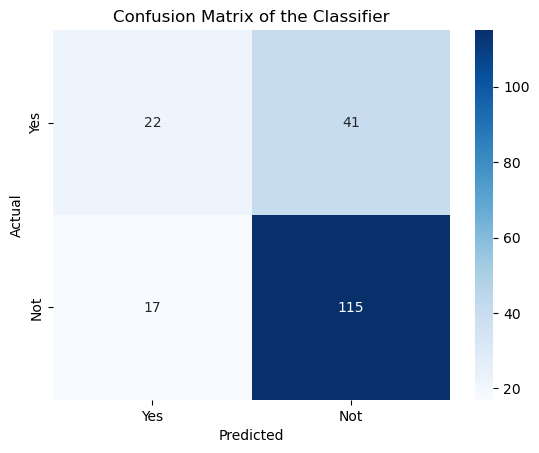

In [64]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")

# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Yes', 'Not'])

Based on the confusion matrix, the logistic regression model correctly classified 115 positive cases and 22 negative cases. However, it misclassified 41 negative cases as positive and 17 positive cases as negative. This indicates that the model has some limitations in accurately predicting certain observations and may require further refinement to improve its overall performance.

# AUC - Area Under the Curve

In [65]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6102


In [67]:
# zipping each feature name to its coefficient
logreg_model_values = zip(apprentice_chef[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.06)
('UNIQUE_MEALS_PURCH', 0.05)
('MOBILE_LOGINS', 0.0)
('NEW_DOMAIN_JUNK', 0.26)
('NEW_DOMAIN_PROFESSIONAL', -0.96)
('HIGH_VALUE', 0.26)
('GOOD_CUSTOMER', 0.77)



#  Full Tree Model

The Decision Tree Classifier had poor generalization with a low AUC score of 0.5552.The model may not be the best model for this dataset, according to these results, and more testing of alternative methods is required to improve performance.

In [68]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [69]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [70]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9897
Full Tree Testing ACCURACY : 0.6
Full Tree AUC Score: 0.5635


## Full Tree Model -Confusion Matrix

In [71]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")



True Negatives : 29
False Positives: 34
False Negatives: 44
True Positives : 88



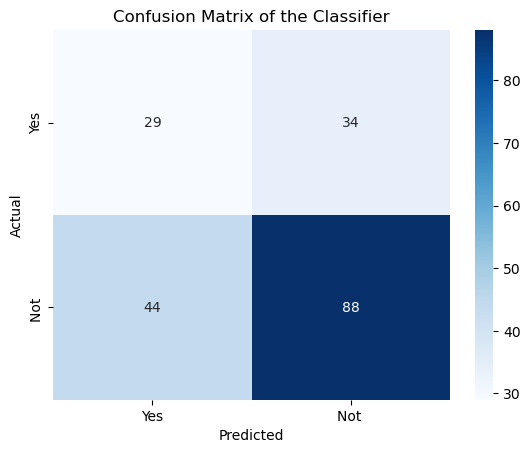

In [72]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = full_tree_pred,
          labels = ['Yes', 'Not '])

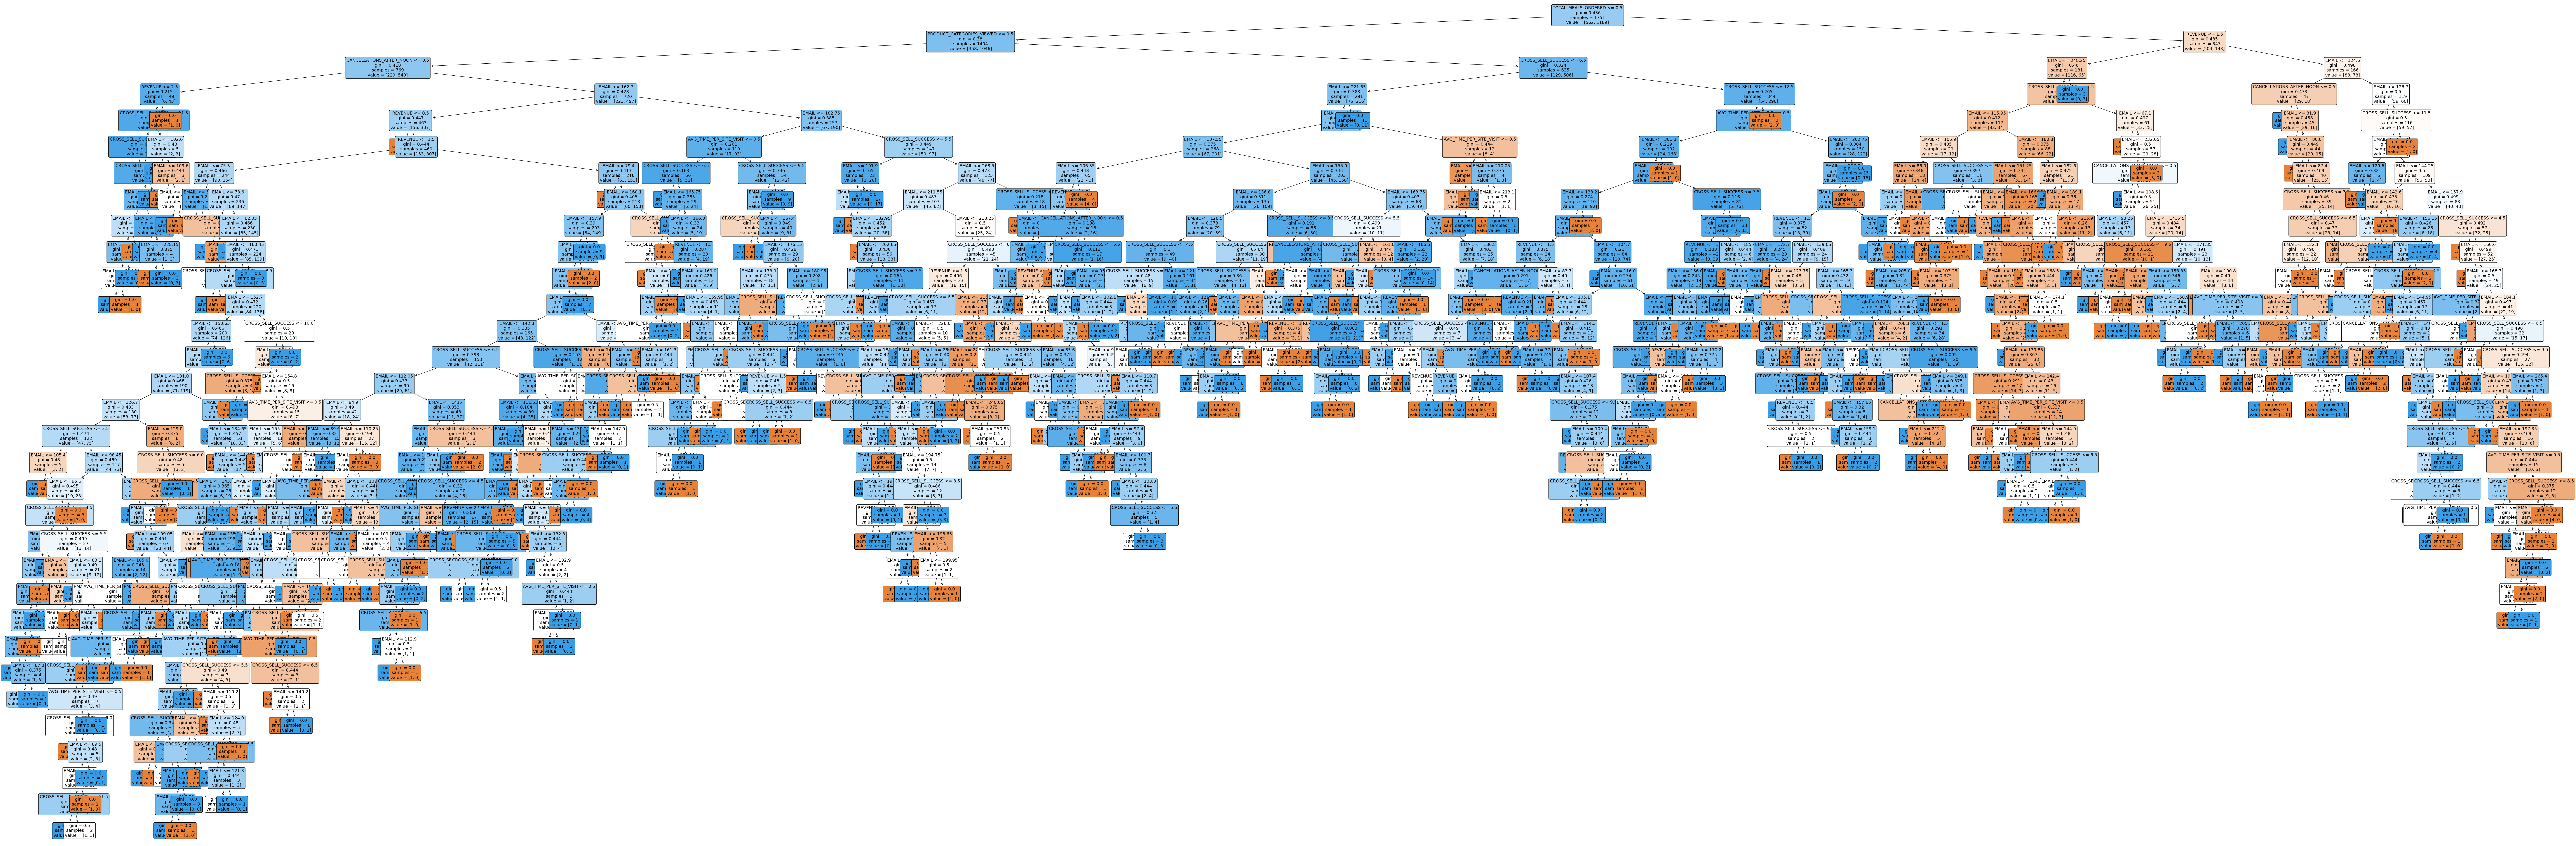

In [73]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = apprentice_chef.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# Pruned Tree Model

This tree model have a better performance but the AUC score of 0.6106 indicates that it may not be the best algorithm for this dataset. The confusion matrix also shows that the model correctly classified a higher number of positive cases compared to negative cases, but still had a considerable number of misclassifications. These results demonstrate the need for exploring other algorithms to achieve better performance.

In [75]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 2,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7139
Testing  ACCURACY: 0.6974
AUC Score        : 0.6106


## Pruned Tree Model -Confusion Matrix

In [76]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 23
False Positives: 40
False Negatives: 19
True Positives : 113



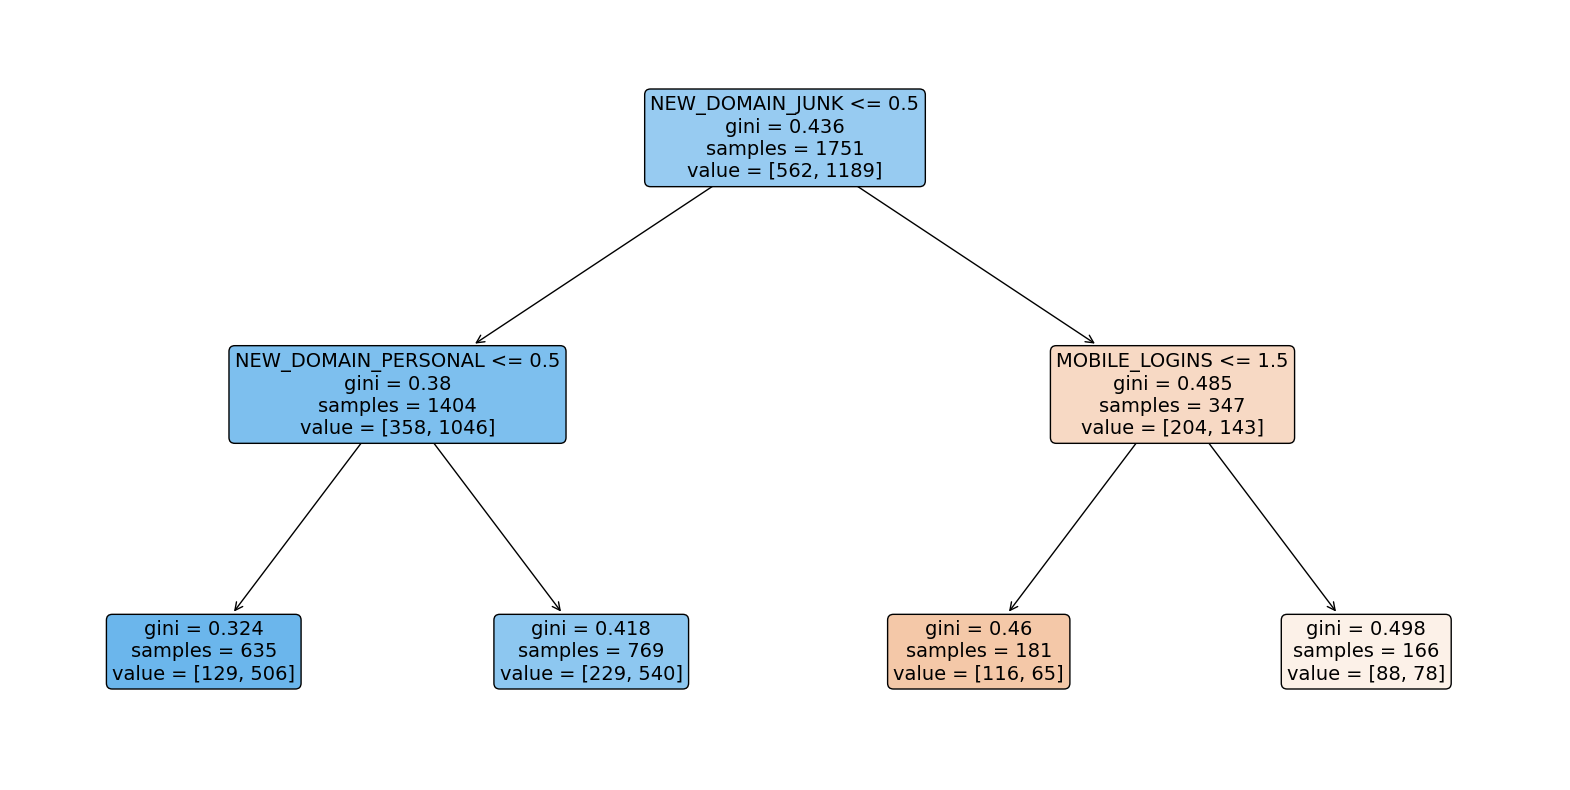

In [77]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

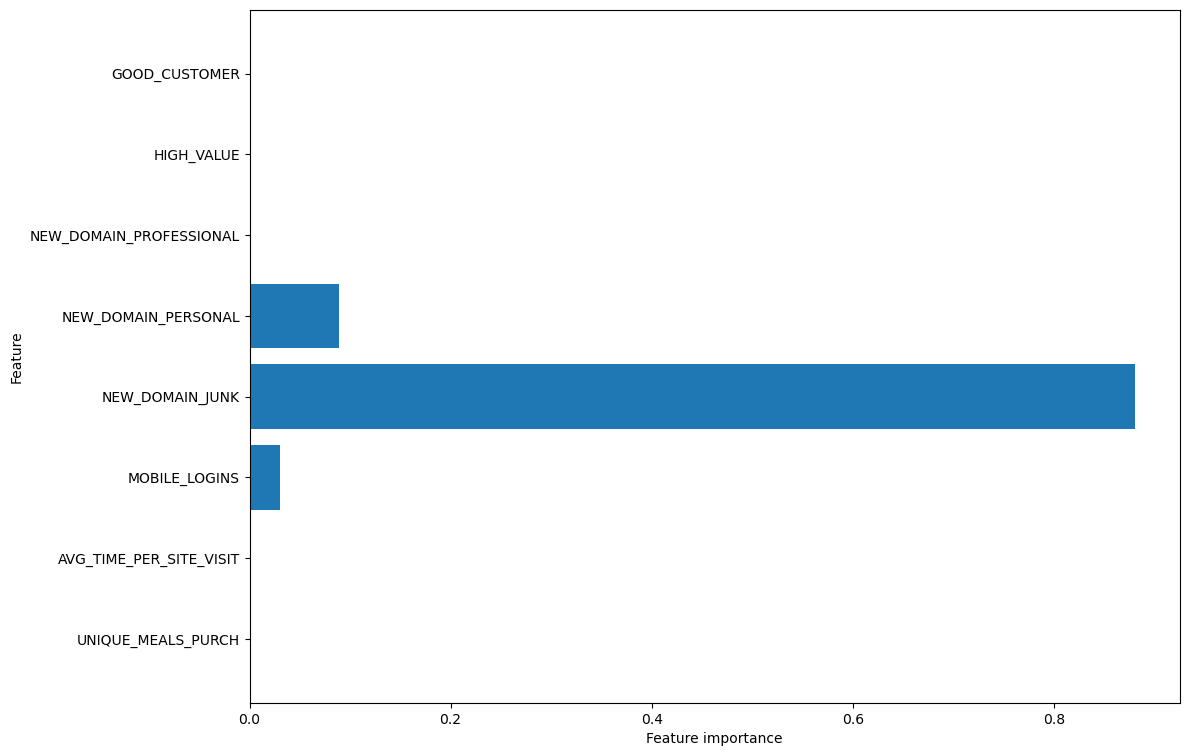

In [78]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

The rendering plot and the feature performance is showing the features with more significance to the variable of Cross Sell Success. The New Domain Junk of email variable leading the chart, which is very curious but at the same time respladed with all the analysis and data about the impact on the cross sell success.

# KNeighbors Classifier

KNeighbors Classifier resulted to give me the better performance and results, with a Accurancy GAP of 0.0178 and a AUC Score of 0.645. Overall, the KNN model is giving me the higher AUC score between the models.

In [79]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [80]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1





/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

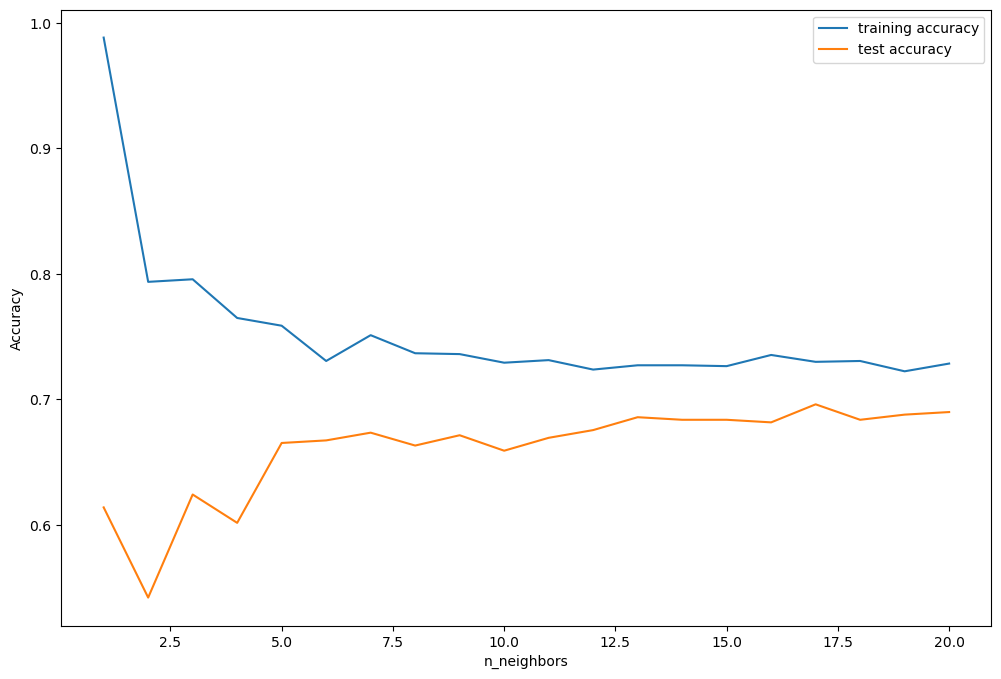

The optimal number of neighbors is: 17


In [81]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = apprentice_chef_data,
                                  y_data        = apprentice_chef_target,
                                  response_type = 'class')

In [82]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(apprentice_chef_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(apprentice_chef_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            apprentice_chef_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = apprentice_chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7207
Testing  ACCURACY: 0.7385
AUC Score        : 0.645


/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

## KNN Confusion Matrix

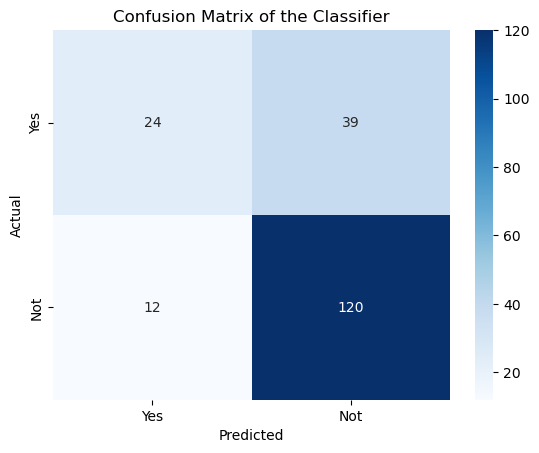

In [83]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Yes', 'Not'])

In [86]:
# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")


True Negatives : 24
False Positives: 39
False Negatives: 12
True Positives : 120



## Other: Hyperparameter Tuning _ Tree Classifier

This model is runned to try improve my score, but it is not really reaching the desired 0.71 of AUC score. But gave me a lower score for some reason

In [93]:
# Declaring a Hyperparameter space  
#In most cases use top , #randomy
criterion_range = ["gini", "entropy"]
splitter_range  = ["best", "random"]
depth_range     = range(1, 8, 1) #range(100, 1005, 50) #Dont build with None, its a bad idea, ideal 2 or 3, start 100, end 1005 and 50 each jump
leaf_range      = range(1, 100, 25) # 1% data, 10% , 1% 


# creating a hyperparameter grid
param_grid = {'criterion' : criterion_range,
              'splitter' : splitter_range,
              'max_depth' : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 5, #5 Diff groups randomly
                                   n_iter                = 1000, #Number of Models its allowed to build-cap
                                   random_state          = 219)




# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                    max_depth=8,
                                    min_samples_leaf=1, 
                                    min_samples_split=2,
                                    random_state=219, splitter='random')




tuned_tree_cv.fit(x_train,y_train)


print(f""" \n Train Metrics:

            CV AUC Score: {round(tuned_tree_cv.best_score_,3)}
            model Parameters: {tuned_tree_cv.best_params_},
            best Model: {tuned_tree_cv.best_estimator_}
            
            """)

/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 112 is smaller than n_iter=1000. Running 112 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 
 Train Metrics:

            CV AUC Score: 0.714
            model Parameters: {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 1, 'criterion': 'gini'},
            best Model: DecisionTreeClassifier(max_depth=1, random_state=219)
            
            


In [94]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [98]:
def tuning_results(cv_results, n=5):
    """
This function will display the top "n" models from hyperparameter tuning,
based on "rank_test_score".

PARAMETERS
----------
cv_results = results dictionary from the attribute ".cv_results_"
n          = number of models to display
    """
    param_lst = []

    for result in cv_results["params"]:
        result = str(result).replace(":", "=")
        param_lst.append(result[1:-1])


    results_df = pd.DataFrame(data = {
        "Model_Rank" : cv_results["rank_test_score"],
        "Mean_Test_Score" : cv_results["mean_test_score"],
        "SD_Test_Score" : cv_results["std_test_score"],
        "Parameters" : param_lst
    })


    results_df = results_df.sort_values(by = "Model_Rank", axis = 0)
    return results_df.head(n = n)

In [102]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeClassifier(splitter         = 'best',
                              min_samples_leaf = 1,
                              max_depth        = 1,
                              criterion        = 'gini',
                              random_state     = 219)

# FITTING to the TRAINING data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score_Accuracy = model.score(x_train, y_train).round(4) # using R-square
model_test_score_Accuracy  = model.score(x_test, y_test).round(4)   # using R-square
model_gap_Accuracy         = abs(model_train_score_Accuracy - model_test_score_Accuracy).round(4)
model_AUC_Score            = roc_auc_score(y_true  = y_test,
                                            y_score = model_pred).round(4)


# displaying results
print('AUC Score Train :', model_train_score_Accuracy)
print('AUC Score Test  :', model_test_score_Accuracy)
print('AUC-Test Gap :', model_gap_Accuracy)
print('AUC-Score :', model_AUC_Score)

AUC Score Train : 0.7139
AUC Score Test  : 0.6974
AUC-Test Gap : 0.0165
AUC-Score : 0.6106


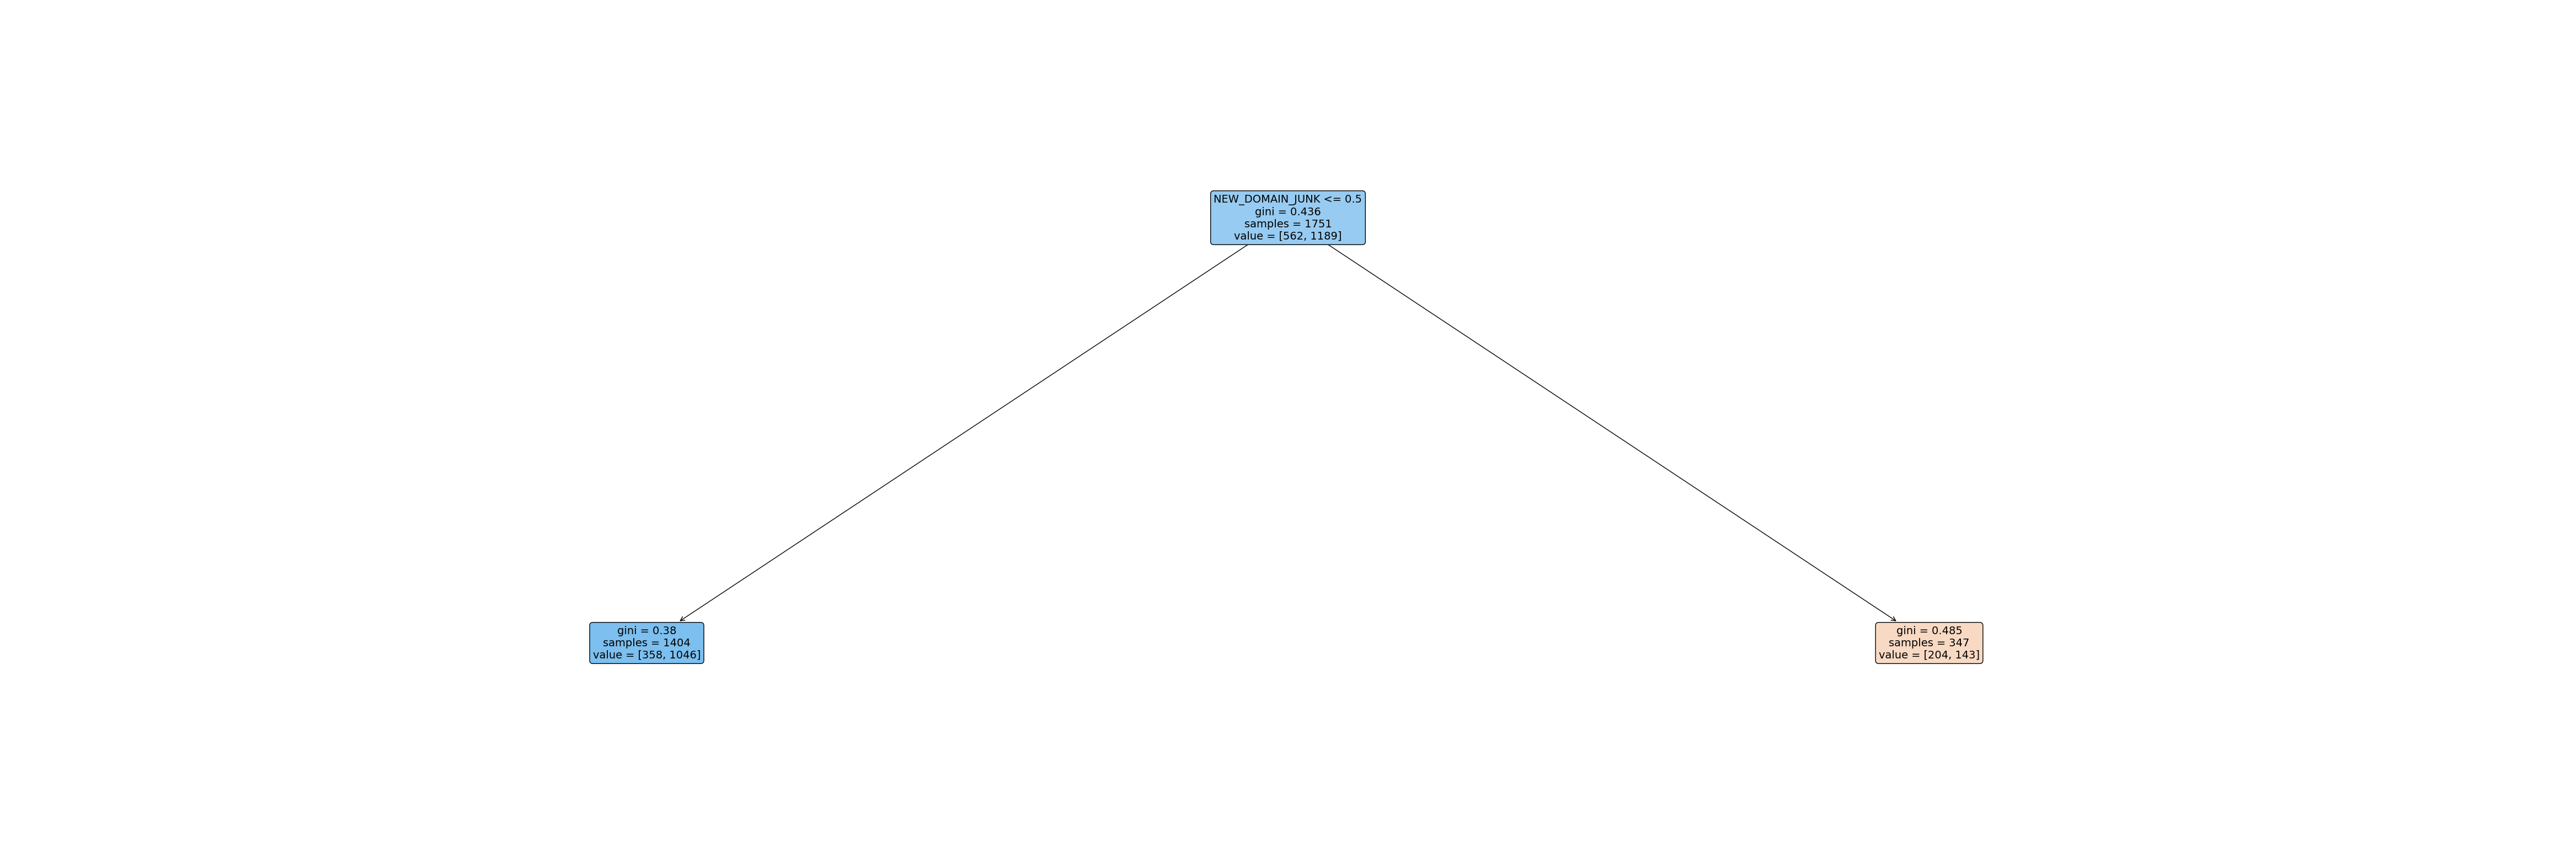

In [103]:
# setting figure size
plt.figure(figsize=(60, 20))


# developing a plotted tree
plot_tree(decision_tree = model, 
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [104]:
help(tuning_results)

Help on function tuning_results in module __main__:

tuning_results(cv_results, n=5)
    This function will display the top "n" models from hyperparameter tuning,
    based on "rank_test_score".
    
    PARAMETERS
    ----------
    cv_results = results dictionary from the attribute ".cv_results_"
    n          = number of models to display



In [105]:
# run tuning_results() on the hyperparameter tuning results
tuning_results(cv_results = tuned_tree_cv.cv_results_, n = 5)

Model_Rank  Mean_Test_Score  SD_Test_Score                                                                            Parameters
0            1         0.713858       0.018559        'splitter'= 'best', 'min_samples_leaf'= 1, 'max_depth'= 1, 'criterion'= 'gini'
62           1         0.713858       0.018559    'splitter'= 'best', 'min_samples_leaf'= 76, 'max_depth'= 1, 'criterion'= 'entropy'
63           1         0.713858       0.018559  'splitter'= 'random', 'min_samples_leaf'= 76, 'max_depth'= 1, 'criterion'= 'entropy'
67           1         0.713858       0.018559  'splitter'= 'random', 'min_samples_leaf'= 26, 'max_depth'= 2, 'criterion'= 'entropy'
69           1         0.713858       0.018559  'splitter'= 'random', 'min_samples_leaf'= 51, 'max_depth'= 2, 'criterion'= 'entropy'

# Results: Model Output 

To conclude, the higher results obtained from the KNeighbors model, with an AUC score of 0.645 reason why is the model selected as my "best model". The values of the confusion matrix identify 120 positive cases and 24 negative cases, but with a missclassification of 39 values being positive and 12 negative, being careful there to consider how accurate will be my results. 

With this analysis the data and values obtained from the different models, shows that the Logistic and Pruned Tree models have scores that are similar to the chosen model and that differ by only 0.03 points, suggesting that both should be taken into consideration also. The  

Overall, the important insights of this project is to understand the importance of building features that impact on the score of the model for , by selecting the variables that been higher correlated with the Cross Sell Success, that show me the smallest P-Value on the Logistic Regression model samples. The selection and analysis of each variable from the beginning, the importance to have binary numerical data for the models. 

In [106]:
# Comparing results
#Results of the hypertuning not considered due to a decrease on the actual score.
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
KNN           {knn_auc_score}                 {knn_tn, knn_fp, knn_fn, knn_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree', "KNN"],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score , knn_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, knn_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, knn_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (knn_tn, knn_fp, knn_fn, knn_tp) ]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6102         (22, 41, 17, 115)
Full Tree     0.5635           (29, 34, 44, 88)
Pruned Tree   0.6106         (23, 40, 19, 113)
KNN           0.645                 (24, 39, 12, 120)



Bibliography:

(1) Chartier, J. (2021, February 3). The six c’s of cross-selling success. Retrieved from McKinsey & Company: https://www.mckinsey.com/capabilities/strategy-and-corporate-finance/our-insights/the-strategy-and-corporate-finance-blog/the-six-cs-of-cross-selling-success

Words in markdown: 1614